In [41]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [42]:
%matplotlib inline
# %matplotlib notebook

In [43]:
fs_ISISCE_Hybrid_Id = []
fs_ISISCE_Hybrid_Bulk = []
fs_IS_Id = []
fs_ISCE_Id = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
n_files = 11
for n in range(n_files):
    fs_ISISCE_Hybrid_Id.append(h5py.File(f'Hybrid/Shocktube1D/ideal/data_serial_{n}.hdf5', 'r'))
#     fs_ISISCE_Hybrid_Bulk.append(h5py.File(f'Hybrid/Shocktube1D/bulk/data_serial_{n}.hdf5', 'r'))
for n in range(6):
    fs_IS_Id.append(h5py.File(f'IS/Shocktube1D/ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_Id.append(h5py.File(f'ISCE/Shocktube1D/ideal/data_serial_TIx_{n}.hdf5', 'r'))
fss = [fs_ISISCE_Hybrid_Id, fs_IS_Id, fs_ISCE_Id]
labels = ['Hybrid IS-ISCE', 'IS', 'ISCE']
lss = ['solid','dashed','dotted']

In [44]:
for fs in fss:
    print(fs[0]['Domain'].attrs.keys())
    print(fs[0]['Primitive'].attrs['varOrder'])

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>
b'v1,v2,v3,p,rho,n,q1,q2,q3,Pi,pi11,pi12,pi13,pi22,pi23,pi33,'
<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>
b'v1,v2,v3,p,rho,n,q1,q2,q3,Pi,pi11,pi12,pi13,pi22,pi23,pi33,'
<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>
b'v1,v2,v3,p,rho,n,q1,q2,q3,Pi,pi11,pi12,pi13,pi22,pi23,pi33,'


In [45]:
for fs in fss:
    print(fs[0]['Optional'].attrs['zeta'])

[1.e-15]
[1.e-15]
[1.e-15]


In [46]:
for fs in fss:
    print(fs[-1].attrs['t'])

[0.4]
[0.4]
[0.4]


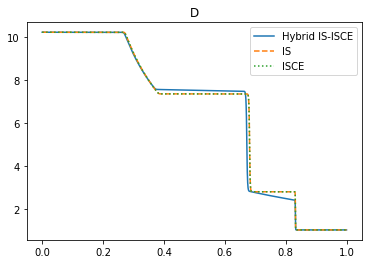

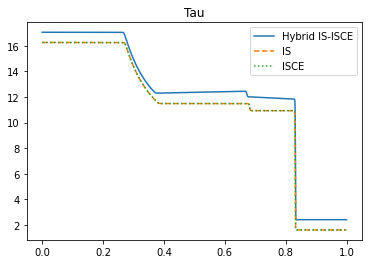

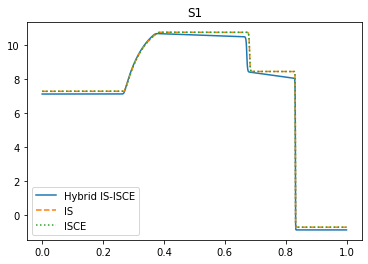

In [47]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for fs, label, ls in zip(fss, labels, lss):
#         plt.plot(fs[0]['Domain/x'], fs[0]['Conserved/'+quant][:],label=label)   #label=rf"$t=${fs[0].attrs['t'][0]:.2e}")
        plt.plot(fs[-1]['Domain/x'], fs[-1]['Conserved/'+quant][:],label=label,ls=ls)   #label=rf"$t=${fs[-1].attrs['t'][0]:.2e}")

        #         for f in fs:
    #             plt.plot(f['Domain/x'], f['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
#     plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


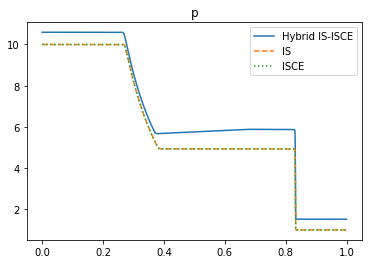

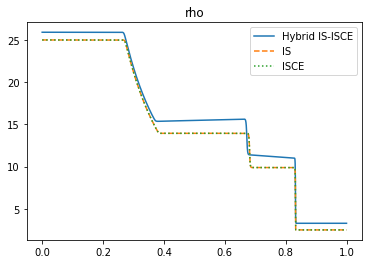

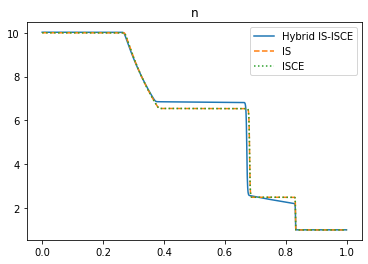

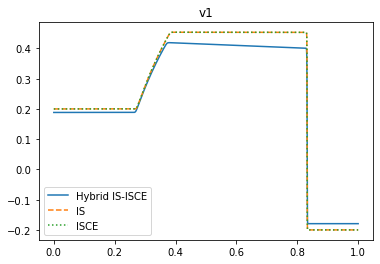

In [49]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['p','rho','n','v1']:
    plt.figure()
    for fs, label, ls in zip(fss, labels, lss):
#         plt.plot(fs[0]['Domain/x'], fs[0]['Primitive/'+quant][:],label=label, ls=ls) #label=rf"$t=${fs[0].attrs['t'][0]:.2e}")
        plt.plot(fs[-1]['Domain/x'], fs[-1]['Primitive/'+quant][:],label=label, ls=ls) #label=rf"$t=${fs[-1].attrs['t'][0]:.2e}")

        #         for f in fs:
    #             plt.plot(f['Domain/x'], f['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
#     plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()
